In [1]:
import os
os.getcwd() 

'/Users/izapreev/Projects/ML-PT'

In [2]:
# Make sure the source code auto reloads into the kernel
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import matplotlib.pyplot as plt

from src.utils.logger import logger

In [4]:
from src.utils.file_utils import load_numpy_zc

# Load the features file for further use
file_name = os.path.join('.', 'data', 'X.npz')
X, = load_numpy_zc(file_name, ['X'])

23:54:20 INFO (file_utils:32): Loading compressed numpy z file from: ./data/X.npz
23:54:20 INFO (file_utils:35): File loading and data extraction are done!


In [5]:
%%capture
from src.features.utils import create_2d_projection

# Compute the feature space projection
X_proj = create_2d_projection(X)

In [6]:
from tqdm.notebook import tqdm
from src.model.dbscan.tuning import fit_dbscan_clusters

# According to:
#     https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
# the min_samples sizee for the dataset is to be chosen as:
#     min_samples = 2 * dim ( where dim is the dimensions of your data set)
min_samples = 2 * X.shape[1]
logger.info(f'Choosing the min_samples value: {min_samples}')

# Perform primitive grid search using the S value of the kneed algorithm
s_values = list(range(1, 60, 2))
s_results = []
for s_value in tqdm(s_values, desc=f'Computing number of clusters'):
    s_results.append(fit_dbscan_clusters(X, min_samples, s_value))

23:56:56 INFO (548879672:9): Choosing the min_samples value: 18


Computing number of clusters:   0%|          | 0/30 [00:00<?, ?it/s]

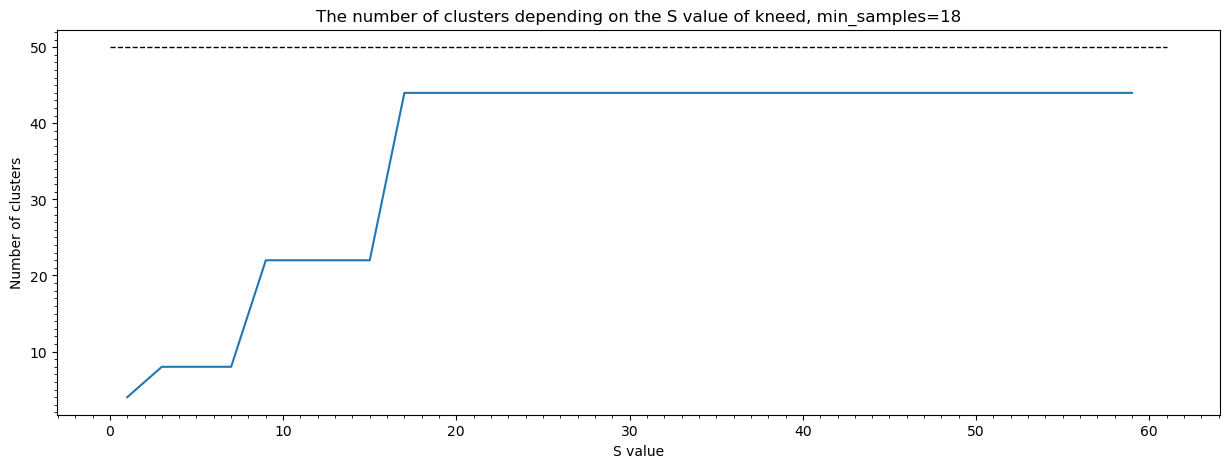

In [28]:
from matplotlib.ticker import MultipleLocator
                                    
# Plot the resulting data number of clusters depending on the S value for finding the knee/elbow point
# Note that the task claims there can be at most 50 attack classes
fig, ax = plt.subplots(figsize=(15, 5))
label_counts = [len(data['cluster_labels']) for data in s_results]
_ = plt.plot(s_values, label_counts)
plt.plot([0, 61], [50, 50], 'k--', lw=1)
plt.title(f'The number of clusters depending on the S value of kneed, min_samples={min_samples}')
ax.set_xlabel('S value')
ax.set_ylabel('Number of clusters')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

In [9]:
#################################################################
# Considering min_samples=18, S in range [1, 1]

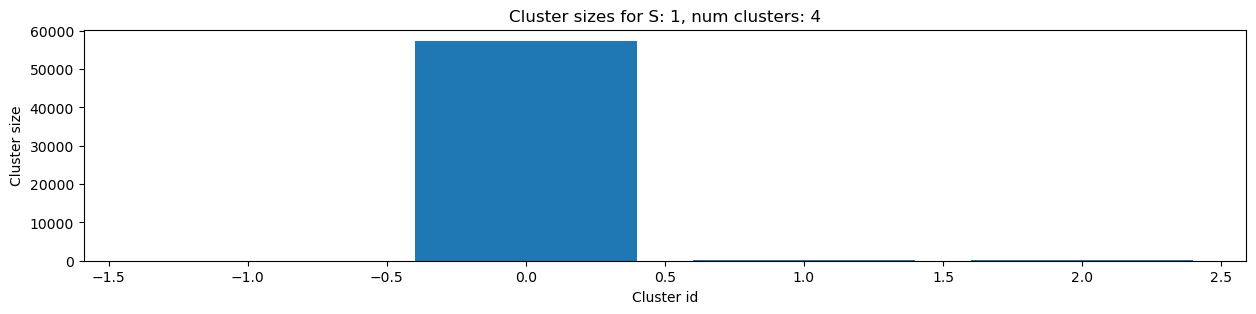

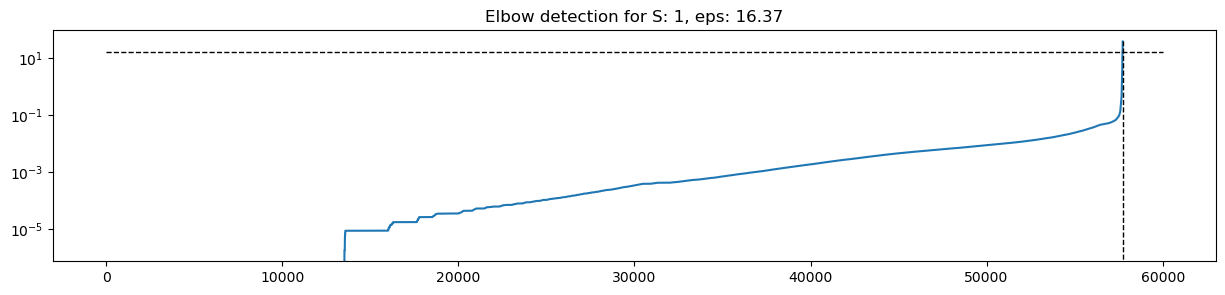

In [45]:
from src.model.dbscan.utils import plot_cluster_sizes_for_s

# Let us check on the being and end constant cluster size ranges
data_1 = plot_cluster_sizes_for_s(s_values, s_results, 1)

10:39:56 INFO (utils:23): Found noize label index: 0, noize samples count: 58, noize: 0.1 %


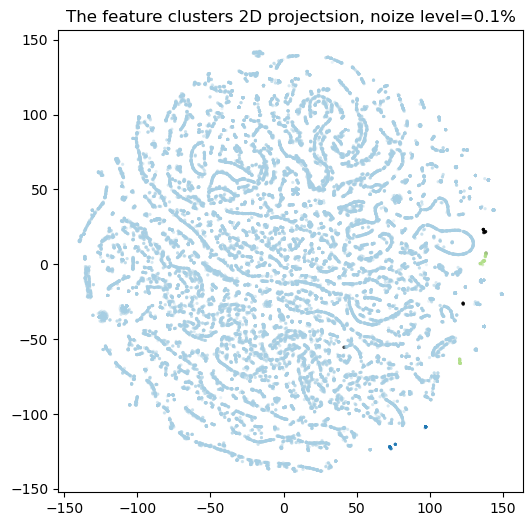

In [47]:
from src.model.dbscan.utils import plot_2d_feature_space_clusters

# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_1['clusterer'])

In [12]:
#################################################################
# Considering min_samples=18, S in range [3, 7]

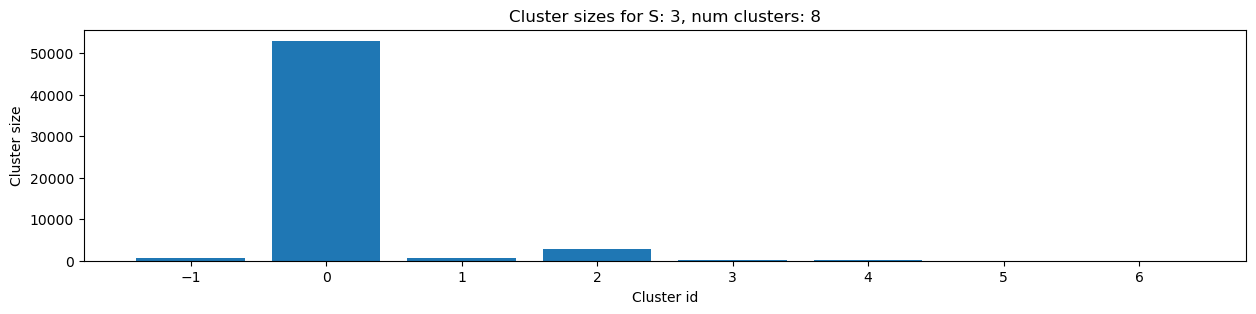

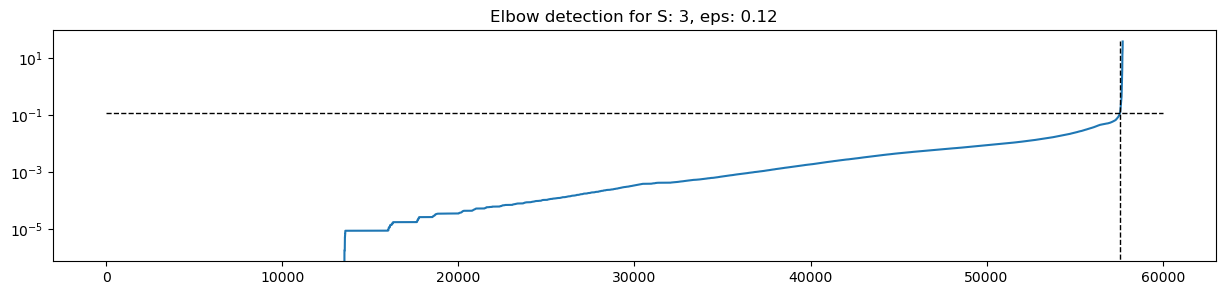

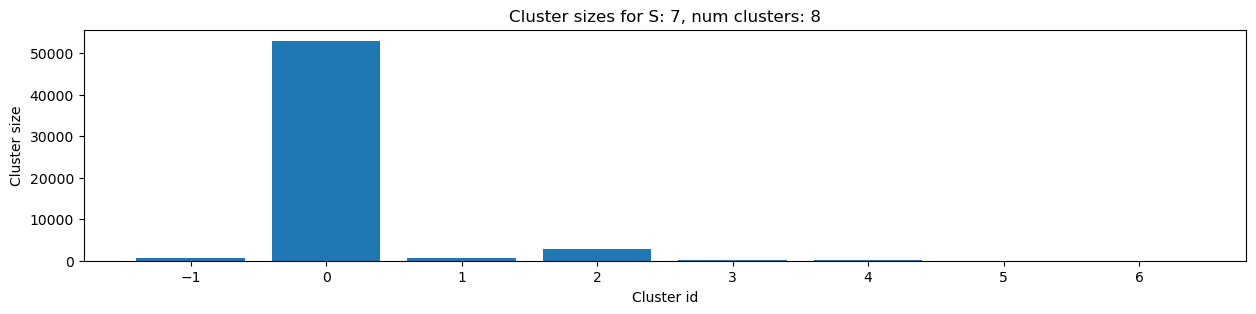

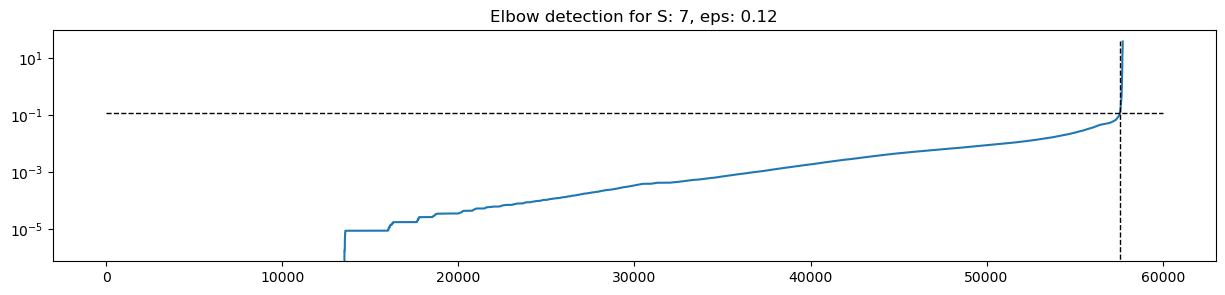

In [13]:
# Let us check on the being and end constant cluster size ranges
data_3 = plot_cluster_sizes_for_s(s_values, s_results, 3)
data_7 = plot_cluster_sizes_for_s(s_values, s_results, 7)

00:28:11 INFO (utils:32): Found noize label index: 0, noize samples count: 570, noize: 0.99 %
00:28:11 INFO (utils:32): Found noize label index: 0, noize samples count: 570, noize: 0.99 %


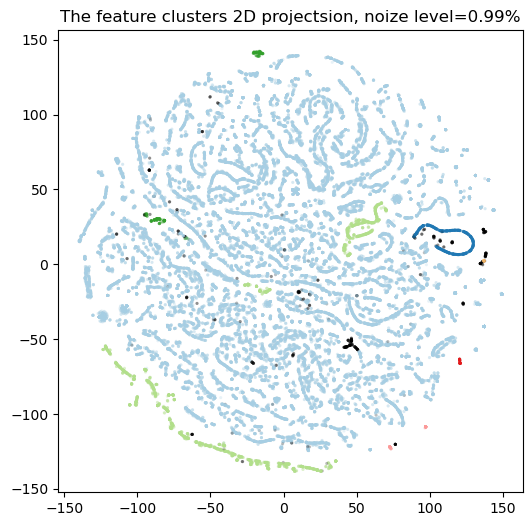

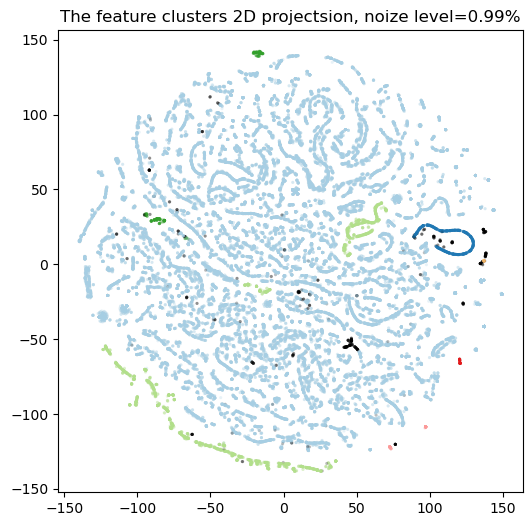

In [42]:
# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_3['clusterer'])
plot_2d_feature_space_clusters(X_proj, data_7['clusterer'])

In [15]:
#################################################################
# Considering min_samples=18, S in range [9, 15]

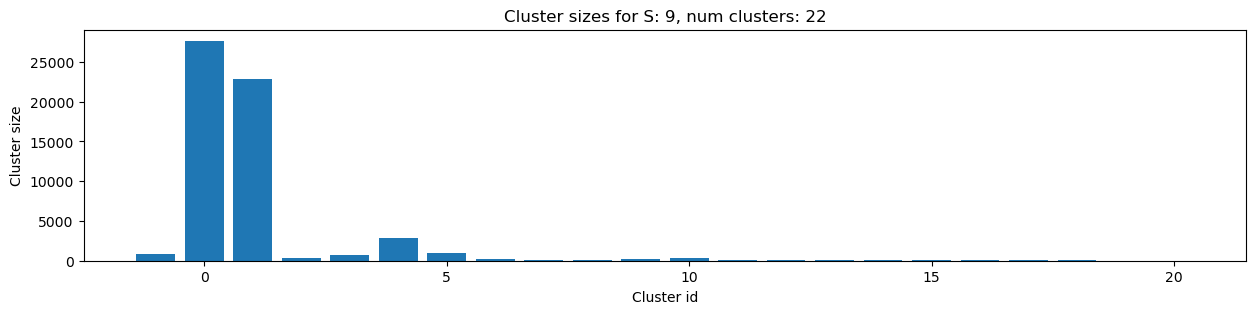

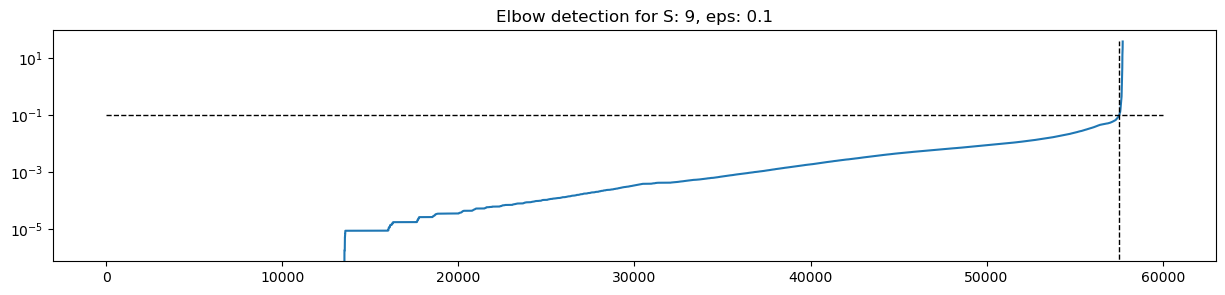

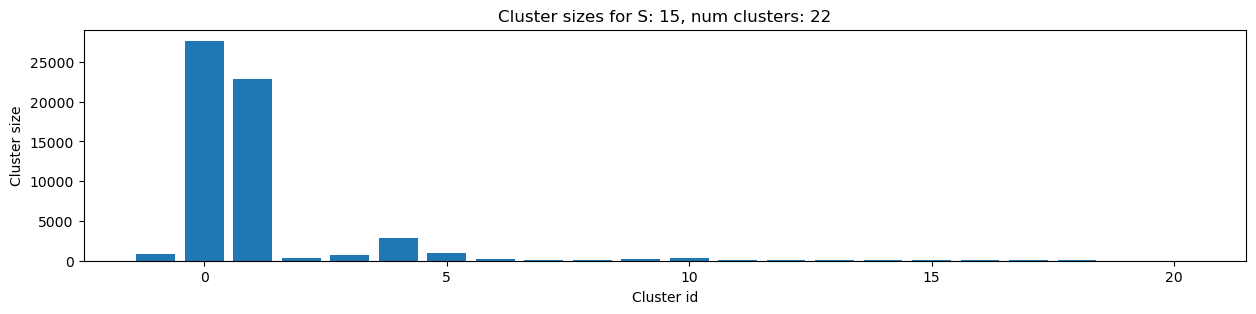

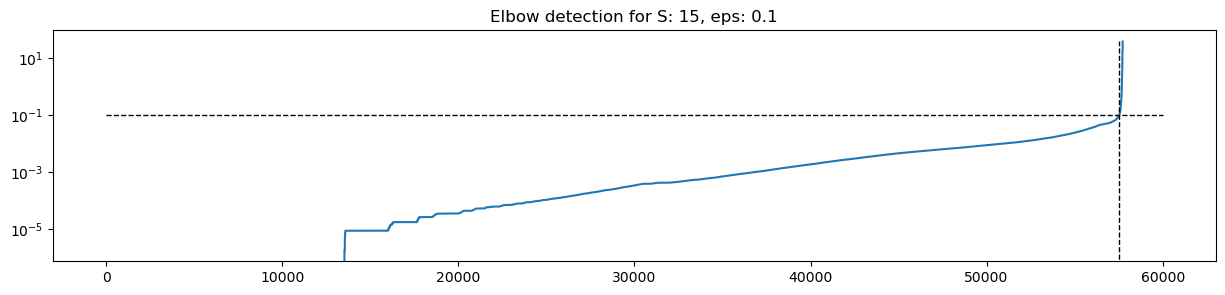

In [16]:
# Let us check on the being and end constant cluster size ranges
data_9 = plot_cluster_sizes_for_s(s_values, s_results, 9)
data_15 = plot_cluster_sizes_for_s(s_values, s_results, 15)

00:28:36 INFO (utils:32): Found noize label index: 0, noize samples count: 891, noize: 1.54 %
00:28:36 INFO (utils:32): Found noize label index: 0, noize samples count: 891, noize: 1.54 %


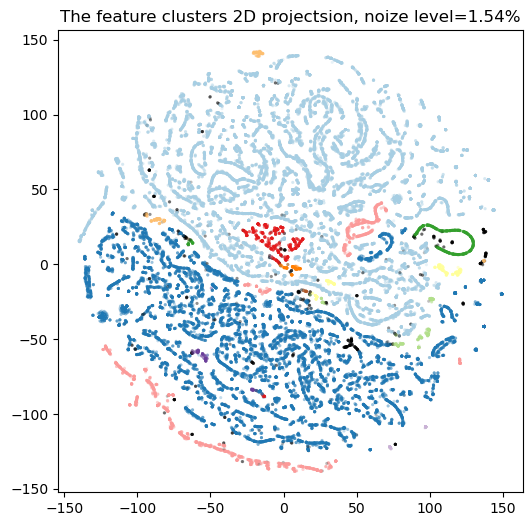

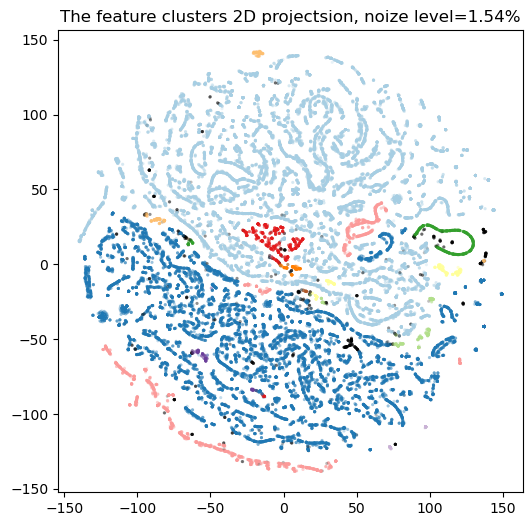

In [43]:
# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_9['clusterer'])
plot_2d_feature_space_clusters(X_proj, data_15['clusterer'])

In [21]:
#################################################################
# Considering min_samples=18, S in range [17, 59]

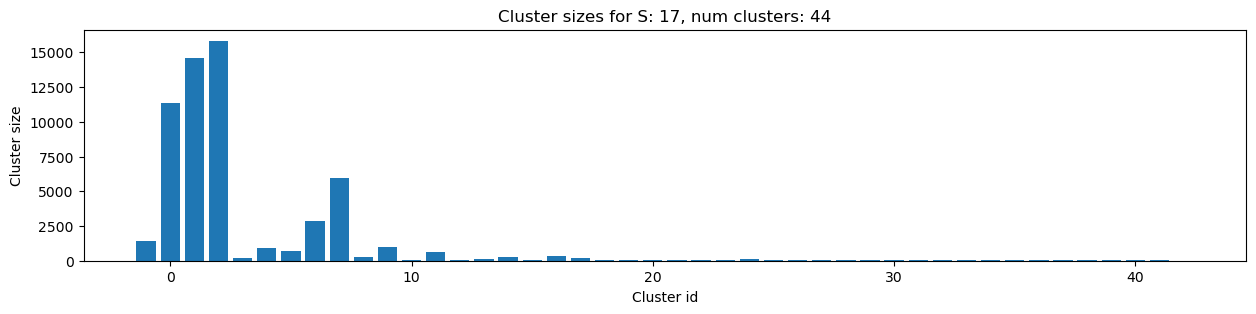

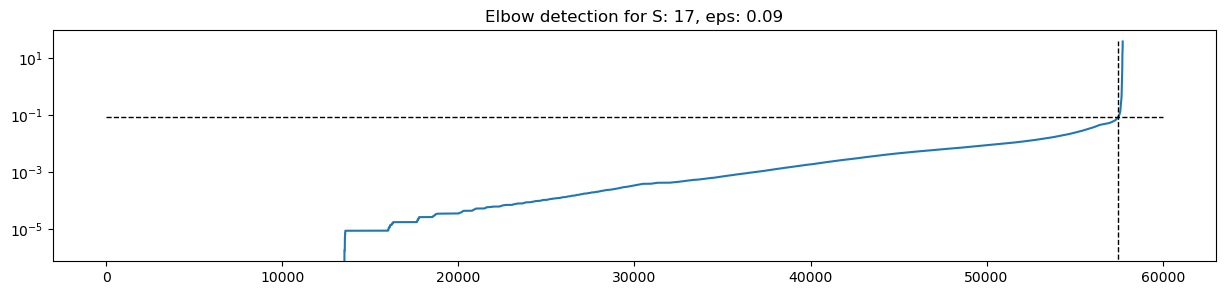

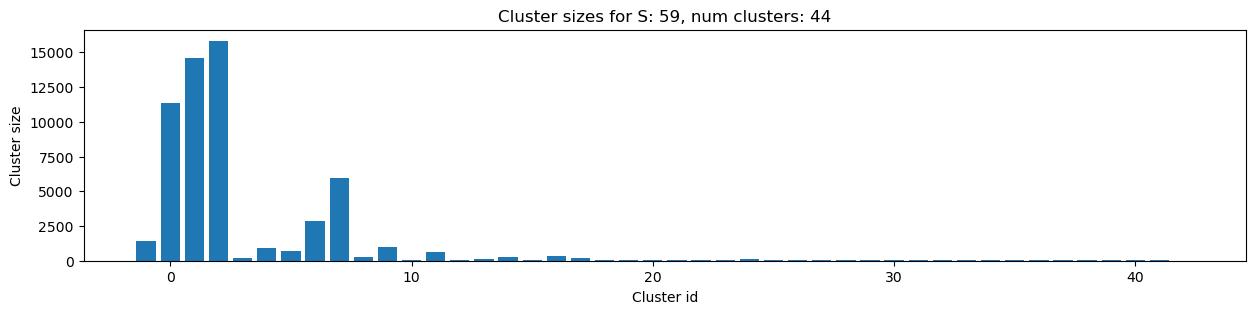

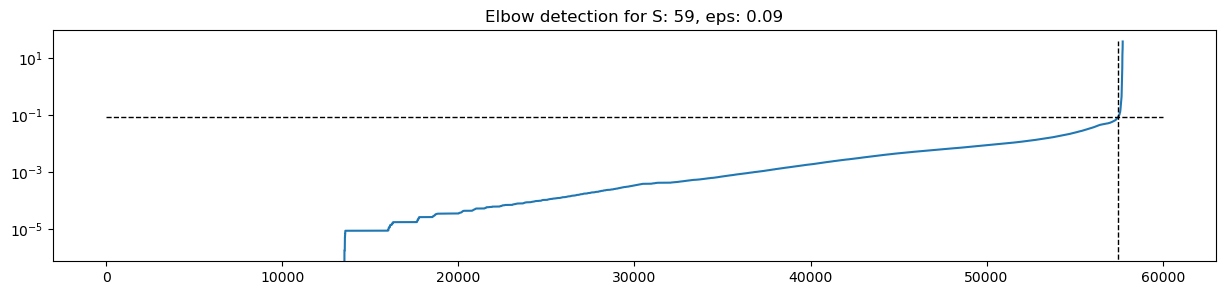

In [31]:
# Let us check on the being and end constant cluster size ranges
data_17 = plot_cluster_sizes_for_s(s_values, s_results, 17)
data_59 = plot_cluster_sizes_for_s(s_values, s_results, 59)

00:28:44 INFO (utils:32): Found noize label index: 0, noize samples count: 1451, noize: 2.51 %
00:28:44 INFO (utils:32): Found noize label index: 0, noize samples count: 1451, noize: 2.51 %


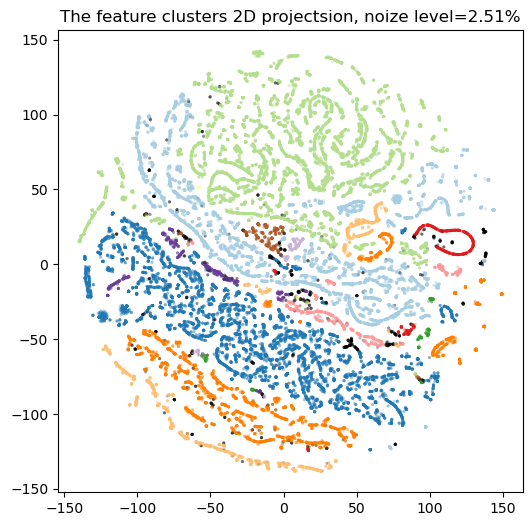

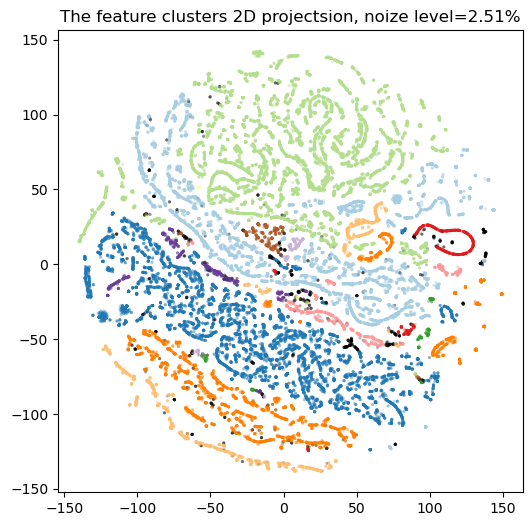

In [44]:
# Visualize the space clusters
plot_2d_feature_space_clusters(X_proj, data_17['clusterer'])
plot_2d_feature_space_clusters(X_proj, data_59['clusterer'])

In [24]:
# According to:
#     https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
# Increasing min_samples can make the clustering progressively more conservative,
# i.e. reducing the cluster sizes and increasing the amount of noize. So reducing
# the min_samples can help reducing the noize levels by making clusters less conservatice.
#
# TODO: Check out smaller min_sample values

In [25]:
#############################################################################
# Summary of observations:
#
#     Observation 1: From the plots above, increasing the S value brings us closer to the true visual Knee/Elbow point
#     
#     Observation 2: Increasing S - getting the better elbow point decreases the value of epsilon and increases the number of clusters and noize
#     
#     Observation 3: The increase in cluster sizes happens in jumps, there is a number of S ranges, each corresponding to a specific number of clusters
#     
#     Observation 4: Within the S range of constant number of clusters there seems to be no visual difference in clustering
#     
#     Observation 5: The number of attack classes, by the task, is claimed to be limited by 50. The largest number of cluster found is 44 (including 1 noize cluster)
#     
#     Observation 6: One could try redicung min_samples to reduce the amount of noize but it is 2.51% in the worst case which seems to be reasonable
#     
#     Observation 7: It is not clear how much of the data are the attack requests, if assumed that the attacks are rare, the largest clusters are to be seen as normal-behavior 
#
#     Conclusion: Using DBSCAN with min_samples=18 and eps=0.09 is the optimal value for clustering
#        
#############################################################################

In [49]:
# Store the resulting clusters for the selected S value as the y vector for the subsequent classifier training
from src.utils.file_utils import store_numpy_zc

# Store the resulting features into file for further use
file_name = os.path.join('.', 'data', 'y')
store_numpy_zc(file_name, y=data_17['clusterer'].labels_)

11:54:28 INFO (file_utils:27): Dumping compressed numpy z file into: ./data/y.npz
11:54:28 INFO (file_utils:29): File dumping is done!
